In [1]:
from keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(19)

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D

from keras import backend as K
K.set_image_dim_ordering('th')
from keras.utils import np_utils

%matplotlib inline

/home/whale/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


### Download data

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

### Brief demonstration

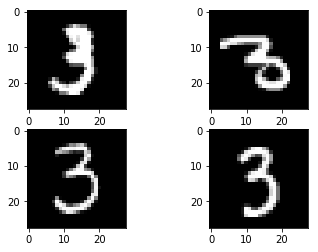

In [3]:
# plot 4 images as gray scale
plt.subplot(221)
plt.imshow(X_train[10], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_train[30], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_train[50], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_train[98], cmap=plt.get_cmap('gray'))
# show the plot
plt.show()

### Preprocessing

### Model

#### The model is fit over 10 epochs with updates every 200 images. The test data is used as the validation dataset, allowing you to see the skill of the model as it trains. A verbose value of 2 is used to reduce the output to one line for each training epoch.

### Convolutional Neural Network

In [4]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [5]:
# reshape to be [samples][pixels][width][height]
X_train = X_train.reshape(X_train.shape[0], 1, 28, 28).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 1, 28, 28).astype('float32')

In [6]:
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

In [7]:
def baseline_model():
    # create model
    model = Sequential()
    #The layer has 30 feature maps, which with the size of 5×5 and a rectifier activation function. 
    #This is the input layer, expecting images with the structure outline above [pixels][width][height]
    model.add(Conv2D(30, (5, 5), input_shape=(1, 28, 28), activation='relu'))
    
    #pooling layer that takes the max called MaxPooling2D. It is configured with a pool size of 2×2.
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    #convolutional layer with 15 feature maps of size 3×3
    model.add(Conv2D(15, (3, 3), activation='relu'))
    
    #Pooling layer taking the max over 2*2 patches
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    #regularization layer using dropout called Dropout. It is configured to randomly exclude 20% of neurons  
    #in the layer in order to reduce overfitting
    model.add(Dropout(0.2))
    
    #layer that converts the 2D matrix data to a vector called Flatten. It allows the output to be processed 
    #by standard fully connected layers
    model.add(Flatten())
    
    #fully connected layer with 128 neurons and rectifier activation function.
    model.add(Dense(128, activation='relu'))
    
    #Fully connected layer with 50 neurons and rectifier activation
    model.add(Dense(50, activation='relu'))
    
    #output layer has 10 neurons for the 10 classes and a softmax activation function to output  
    #probability-like predictions for each class
    model.add(Dense(num_classes, activation='softmax'))
    
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [9]:
# build the model
model = baseline_model()
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Large CNN Error: %.2f%%" % (100-scores[1]*100))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 65s 1ms/step - loss: 0.3733 - acc: 0.8827 - val_loss: 0.0750 - val_acc: 0.9778
Epoch 2/10
60000/60000 [==============================] - 69s 1ms/step - loss: 0.0902 - acc: 0.9723 - val_loss: 0.0556 - val_acc: 0.9821
Epoch 3/10
60000/60000 [==============================] - 70s 1ms/step - loss: 0.0678 - acc: 0.9791 - val_loss: 0.0374 - val_acc: 0.9879
Epoch 4/10
60000/60000 [==============================] - 69s 1ms/step - loss: 0.0539 - acc: 0.9831 - val_loss: 0.0337 - val_acc: 0.9895
Epoch 5/10
60000/60000 [==============================] - 67s 1ms/step - loss: 0.0470 - acc: 0.9853 - val_loss: 0.0310 - val_acc: 0.9897
Epoch 6/10
60000/60000 [==============================] - 67s 1ms/step - loss: 0.0404 - acc: 0.9874 - val_loss: 0.0328 - val_acc: 0.9902
Epoch 7/10
60000/60000 [==============================] - 66s 1ms/step - loss: 0.0376 - acc: 0.9884 - val_loss: 0.0317 - val_acc